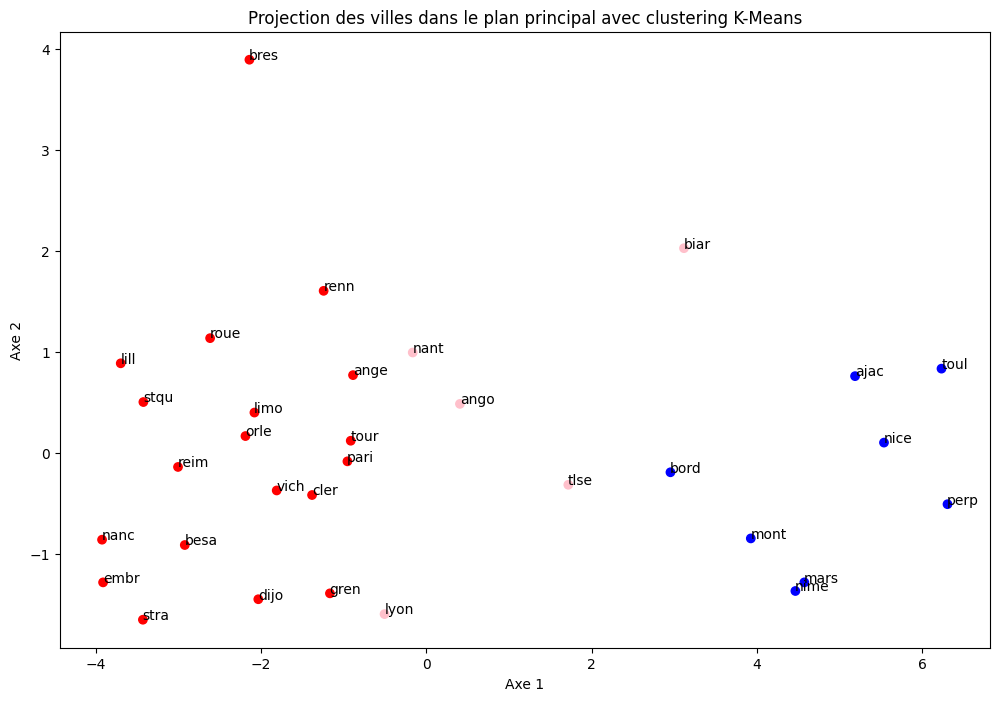

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def analyse_composante_principale_kmeans(path_file: str, start_column_data: int, end_column_data: int, n_clusters: int):
    data = pd.read_csv(path_file, sep=';')
    X = data.iloc[:, start_column_data:end_column_data].values
    labels = data.iloc[:, 0].values
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    kmeans = KMeans(n_clusters=n_clusters)
    clustering = kmeans.fit_predict(X_pca[:, :2]) 
    
    colors = ['red','yellow','blue','pink']
    plt.figure(figsize=(12, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
    
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    
    plt.xlabel("Axe 1")
    plt.ylabel("Axe 2")
    plt.title("Projection des villes dans le plan principal avec clustering K-Means")
    plt.show()

analyse_composante_principale_kmeans('data/villes.csv', 1, 13, 3)